In [2]:
import FinanceDataReader as fdr
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import bs4
import pandas as pd
import numpy as np
import time
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
import json
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import pickle
import timeit
from IPython.display import clear_output
import glob

pd.options.display.float_format = '{:,.3f}'.format

In [12]:
model_data = pd.read_pickle('model_data.pkl')

- #### 가설 - 5일 이동 평균선이 오늘 종가보다 위에 위치해 있다.

'price_from_5ma' 변수는 5일 이동평균선을 매수가격으로 나눈 값입니다. <br>
매수가격보다 5일 이동평균선이 클 수록 좋은 수익율을 보여줍니다. 역시 맞는 가설로 판단됩니다.

                count  mean
ranks                      
(0.799, 0.958]    105 0.419
(0.958, 0.979]    104 0.452
(0.979, 0.995]    104 0.481
(0.995, 1.016]    104 0.452
(1.016, 1.268]    104 0.500


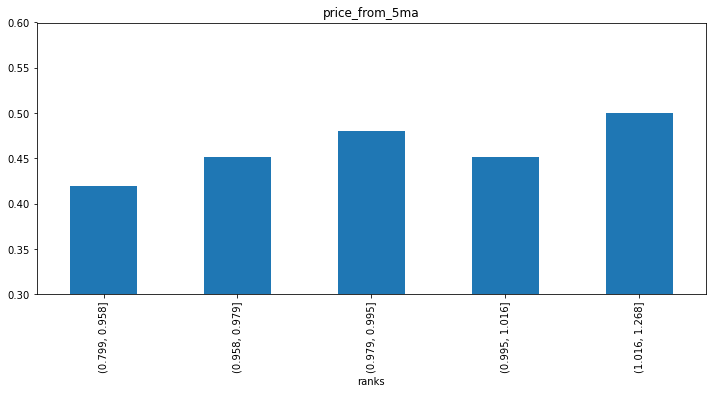

In [11]:
var = 'price_from_5ma'

model_data['target'] = np.where(model_data['return']>1, 1, 0)
model_data['ranks'] = pd.qcut(model_data[var], q = 5)
print(model_data.groupby('ranks')['target'].agg(['count', 'mean']))
model_data.groupby('ranks')['target'].mean().plot(kind='bar', figsize=(12,5), ylim=(0.3, 0.6))
plt.title(var)
plt.show()